# Real examples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Line Graph

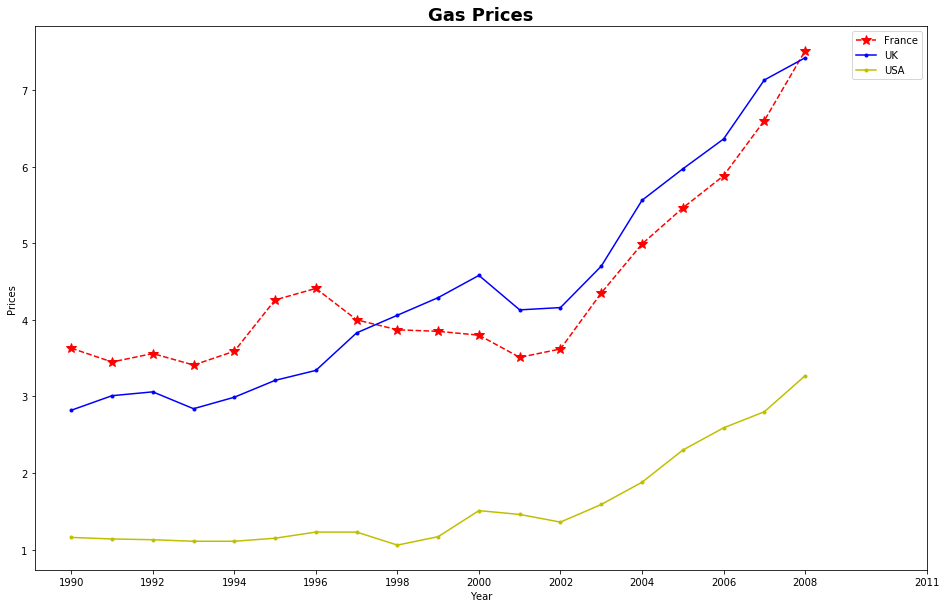

In [2]:
#read in gas prices
gas = pd.read_csv('gas_prices.csv')
gas

#line graph 
plt.figure(figsize =(16,10))
plt.plot(gas.Year, gas.France,  '*r--', label = 'France', markersize=10)
plt.plot(gas.Year,gas.UK, '.b-' ,label = 'UK')
plt.plot(gas.Year, gas.USA,'.y-', label='USA')


plt.title('Gas Prices', fontsize = 18, weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Prices')

#Year = np.arange(1990,2010,2)
Year = (gas.Year[::2].tolist()+[2011])
plt.xticks(Year)

plt.legend()
plt.show()

#quicker way to plot all

# plt.figure(figsize=(16,10))
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country])
# plt.legend()




In [3]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Histograms

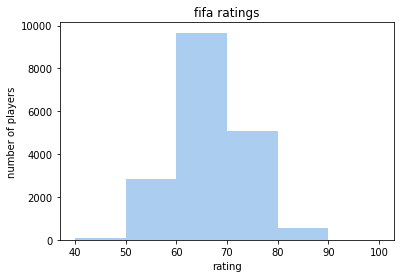

In [4]:

boxes = np.arange(40,110,10)

plt.hist(fifa.Overall, bins = boxes, color ='#abcdef')
plt.title('fifa ratings')
plt.xlabel('rating')
plt.ylabel('number of players')

plt.show()

## Pie Charts

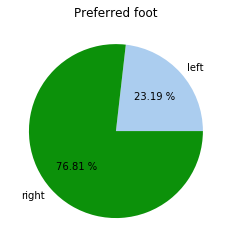

In [5]:
#locate and count players with left or right foot
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']== 'Right'].count()[0]

#pie chart
plt.pie([left,right], labels = ['left','right'], autopct = '%.2f %%', colors = ['#abcdef', '#0c910a'])
plt.title('Preferred foot')

plt.show()

#autopct: shows the percentage of each wedge. %.2f means percentage to 2 floating points(decimal places)
#and then type %% to show percent sign

## pie chart 2

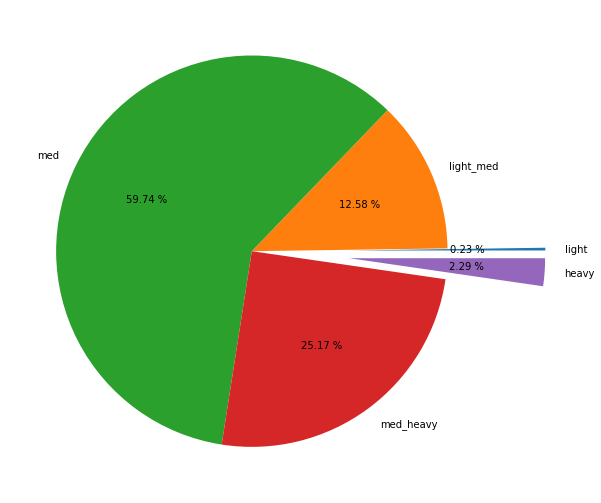

In [24]:
#pie chart for weights of players
fifa.Weight # weights have 'lbs' at end of each so want to get rid of this
Weight = fifa.Weight.str.replace('lbs','')
Weight = [int(x) if type(x)==str else x for x in Weight]


#split weights into sections/wedge
light = []
light_med =[]
med=[]
med_heavy =[]
heavy =[]

for x in Weight:
    if x<125:
        light.append(x)
    elif (x>=125) & (x<150):
        light_med.append(x)
    elif (x>=150) & (x<175):
        med.append(x)
    elif (x>=175) & (x<200):
        med_heavy.append(x)
    else:
        heavy.append(x)

plt.figure(figsize=(10,9))
plt.pie([len(light),len(light_med),len(med),len(med_heavy),len(heavy)],labels =['light','light_med','med','med_heavy','heavy'] ,autopct ='%.2f %%', explode = [0.5,0,0,0,0.5])
plt.show()





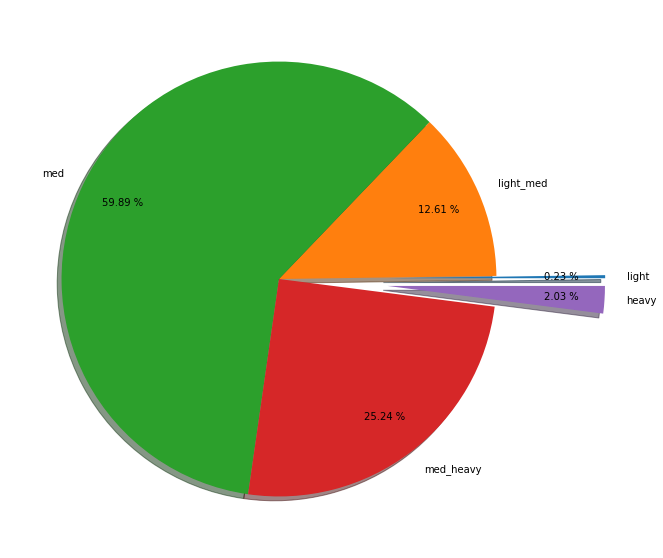

In [25]:
#second way of creating pie chart: uses pandas loc etc
fifa2 = fifa.copy() #make a copy of fifa so original table doesnt get altered
fifa2.Weight =[int(x.strip('lbs'))if type(x)==str else x for x in fifa2.Weight]

light2=fifa2.loc[fifa2.Weight<125].count()[0]
light_med2 =fifa2.loc[(fifa2.Weight>=125)&(fifa2.Weight<150)].count()[0]
med2 = fifa2.loc[(fifa2.Weight>=150)&(fifa2.Weight<175)].count()[0]
med_heavy2 =fifa2.loc[(fifa2.Weight>=175) &(fifa2.Weight<200)].count()[0]
heavy2 = fifa2.loc[fifa2.Weight>=200].count()[0]

Weights2=[light2,light_med2,med2,med_heavy2,heavy2]
Labels =['light','light_med','med','med_heavy','heavy']


plt.figure(figsize=(10,10))
plt.pie(Weights2, labels =Labels, autopct = '%.2f %%', explode =[0.5,0,0,0,0.5], pctdistance = 0.8, shadow=True)
plt.show()

## Box and Whisker Chart

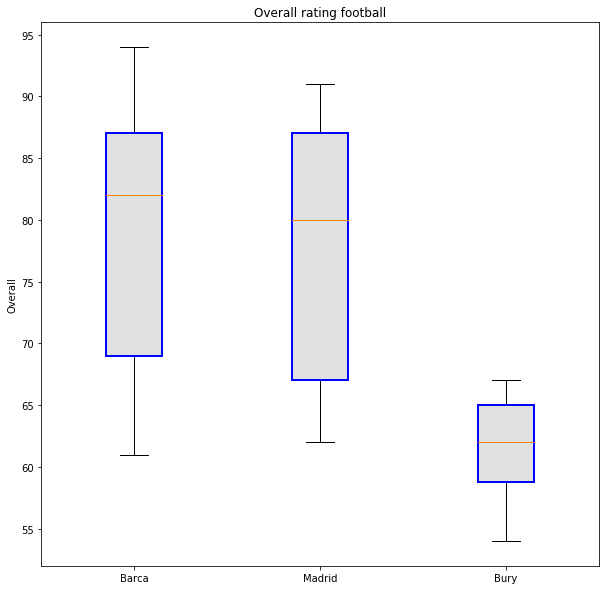

In [46]:
barcelona = fifa.loc[fifa.Club =='FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club=='Real Madrid']['Overall']
bury = fifa.loc[fifa.Club =='Bury']['Overall']

labels = ['Barca', 'Madrid','Bury']

plt.figure(figsize =(10,10))
boxes = plt.boxplot([barcelona,madrid,bury], labels=labels,patch_artist =True) #asign plt to boxes so I can change color etc


#changing color/linewidth etc
for box in boxes['boxes']:
    #edge color/width
    box.set(color='b', linewidth =2)
    
    #fillcolor
    box.set(facecolor ='#e0e0e0') #Note:need patch_artist =True for it to recognise facecolor


plt.title('Overall rating football')
plt.ylabel('Overall')


plt.show()